<center> 

## Projekt NBA
# Python w Analizie Danych
### Anita Szumiec, Patryk Parkitny

###  Prezentowany poniżej skoroszyt przedstawia analizę zbioru danych ze strony kaggle.com. Zbiór dotyczy zawodników NBA oraz ich wybranych cech oraz statystyk.


### Oto lista używanych bibliotek:

In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

C:\Users\Anita\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Pobranie całości pliku .csv, w którym separatorem jest przecinek oraz wydrukowanie danych:

In [3]:
NBA = pd.read_csv(r'C:\Users\Anita\Desktop\NBA.csv', sep=',')
NBA

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Chris Robinson,VAN,23.0,195.58,90.718400,Western Kentucky,USA,1996,2,...,4.6,1.7,1.6,-11.4,0.039,0.088,0.155,0.486,0.156,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.594120,North Carolina-Wilmington,USA,1992,2,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.594120,Iowa,USA,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.130040,Providence,USA,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.594120,None,USA,1996,1,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97
5,5,Martin Lewis,TOR,22.0,198.12,102.058200,Seward County Community College,USA,1995,2,...,1.6,0.7,0.4,-3.5,0.087,0.045,0.135,0.470,0.125,1996-97
6,6,Mark West,CLE,36.0,208.28,111.583632,Old Dominion,USA,1983,2,...,3.2,2.7,0.3,3.5,0.092,0.146,0.137,0.555,0.034,1996-97
7,7,Mark Strickland,MIA,26.0,208.28,99.790240,Temple,USA,Undrafted,Undrafted,...,2.0,1.2,0.0,-17.1,0.109,0.152,0.232,0.448,0.013,1996-97
8,8,Mark Price,GSW,33.0,182.88,81.646560,Georgia Tech,USA,1986,2,...,11.3,2.6,4.9,-3.1,0.023,0.088,0.192,0.597,0.289,1996-97
9,9,Mark Jackson,IND,32.0,190.50,83.914520,St. John's (NY),USA,1987,1,...,9.9,4.8,11.4,-2.0,0.035,0.116,0.155,0.525,0.464,1996-97


### Poprzednie pobranie pokazało jak wiele kolumn okaże się niepotrzebne w analizie. W celu nie zaśmiecania pamięci podmienione zostały dane na takie, ktore będą miały tylko interesujące nas kolumny. Imie i nazwisko zawodnika stało się indeksem :

In [4]:
NBA = pd.read_csv(r'C:\Users\Anita\Desktop\NBA.csv', sep=',',usecols=['player_name','team_abbreviation','age','player_height','player_weight','country','draft_year','gp','pts','reb','ast','season'],index_col='player_name') 
NBA.head()  #pokazanie tylko 5 pierwszych

,team_abbreviation,age,player_height,player_weight,country,draft_year,gp,pts,reb,ast,season
player_name,,,,,,,,,,,
Chris Robinson,VAN,23.0,195.58,90.71840,USA,1996,41,4.6,1.7,1.6,1996-97
Matt Fish,MIA,27.0,210.82,106.59412,USA,1992,6,0.3,0.8,0.0,1996-97
Matt Bullard,HOU,30.0,208.28,106.59412,USA,Undrafted,71,4.5,1.6,0.9,1996-97
Marty Conlon,BOS,29.0,210.82,111.13004,USA,Undrafted,74,7.8,4.4,1.4,1996-97
Martin Muursepp,DAL,22.0,205.74,106.59412,USA,1996,42,3.7,1.6,0.5,1996-97


### W celu łatwiejszego odwoływania się, zmienione zostały nazwy kolumn:

In [5]:
# nazywanie kolumn

NBA.columns=['druzyna', 'wiek',
       'wzrost', 'waga', 'kraj', 'rok_draftu',
        'gry_sezon', 'sr_pkt', 'sr_zb', 'sr_as', 'sezon']
NBA.index.names = ['zawodnik'] #indeks
NBA.head()

,druzyna,wiek,wzrost,waga,kraj,rok_draftu,gry_sezon,sr_pkt,sr_zb,sr_as,sezon
zawodnik,,,,,,,,,,,
Chris Robinson,VAN,23.0,195.58,90.71840,USA,1996,41,4.6,1.7,1.6,1996-97
Matt Fish,MIA,27.0,210.82,106.59412,USA,1992,6,0.3,0.8,0.0,1996-97
Matt Bullard,HOU,30.0,208.28,106.59412,USA,Undrafted,71,4.5,1.6,0.9,1996-97
Marty Conlon,BOS,29.0,210.82,111.13004,USA,Undrafted,74,7.8,4.4,1.4,1996-97
Martin Muursepp,DAL,22.0,205.74,106.59412,USA,1996,42,3.7,1.6,0.5,1996-97


### Aby dane były z określonego przedziału czasowego zostały zawężone do sezonu 2016/2017:

In [6]:
names = ['2016-17']  # wybieramy tylko jeden sezon
NBA_16 = NBA[NBA['sezon'].isin(names)]

NBA_16.head()

,druzyna,wiek,wzrost,waga,kraj,rok_draftu,gry_sezon,sr_pkt,sr_zb,sr_as,sezon
zawodnik,,,,,,,,,,,
Yogi Ferrell,DAL,24.0,182.88,81.64656,USA,Undrafted,46,10.0,2.4,3.7,2016-17
Zaza Pachulia,GSW,33.0,210.82,124.73780,Georgia,2003,70,6.1,5.9,1.9,2016-17
Zach Randolph,MEM,35.0,205.74,117.93392,USA,2001,73,14.1,8.2,1.7,2016-17
Zach LaVine,MIN,22.0,195.58,83.91452,USA,2014,47,18.9,3.4,3.0,2016-17
Tyson Chandler,PHX,34.0,215.90,108.86208,USA,2001,47,8.4,11.5,0.6,2016-17


### Aby sprawdzić czy kolumny, na których mamy zamiar prowadzić analizy mają odpowiedni typ używamy funkcji dtypes() :

In [6]:
NBA.dtypes # sprawdzamy czy typy nam się zgadzają (object to tekst)

druzyna        object
wiek          float64
wzrost        float64
waga          float64
kraj           object
rok_draftu     object
gry_sezon       int64
sr_pkt        float64
sr_zb         float64
sr_as         float64
sezon          object
dtype: object

### Dane są kompletne i mają odpowiednie typy. Możemy zacząć analizę. Zacznijmy od posortowania zawodników ze względu na wzrost. Dzięki temu dowiemy się jaki był najniższy i najwyższy zawodnik w sezonie 16/17:

In [7]:
NBA_sort=NBA_16.sort_values(by=['wzrost', 'wiek']) # pokaz jak dziala sortowanie, wzrost od najnizeszego
NBA_sort.head()  # najniższy

,druzyna,wiek,wzrost,waga,kraj,rok_draftu,gry_sezon,sr_pkt,sr_zb,sr_as,sezon
zawodnik,,,,,,,,,,,
Kay Felder,CLE,22.0,175.26,79.832192,USA,2016,42,4.0,1.0,1.4,2016-17
Isaiah Thomas,BOS,28.0,175.26,83.914520,USA,2011,76,28.9,2.7,5.9,2016-17
Tyler Ulis,PHX,21.0,177.80,68.038800,USA,2016,61,7.3,1.6,3.7,2016-17
Pierre Jackson,DAL,25.0,177.80,81.646560,USA,2013,8,4.4,1.1,2.4,2016-17
Ty Lawson,SAC,29.0,180.34,88.450440,USA,2009,69,9.9,2.6,4.8,2016-17


In [8]:
NBA_sort.tail() # najwyzszy

,druzyna,wiek,wzrost,waga,kraj,rok_draftu,gry_sezon,sr_pkt,sr_zb,sr_as,sezon
zawodnik,,,,,,,,,,,
Roy Hibbert,DEN,30.0,218.44,122.46984,USA,2008,48,4.6,3.2,0.4,2016-17
Salah Mejri,DAL,31.0,218.44,111.13004,Tunisia,Undrafted,73,2.9,4.2,0.2,2016-17
Kristaps Porzingis,NYK,21.0,220.98,108.86208,Latvia,2015,66,18.1,7.2,1.5,2016-17
Edy Tavares,CLE,25.0,220.98,120.20188,Cabo Verde,2014,2,4.0,5.5,0.5,2016-17
Boban Marjanovic,DET,28.0,220.98,131.54168,Serbia,Undrafted,35,5.5,3.7,0.3,2016-17


### Spróbujemy również wybrać z zawodników tylko tych, którzy są z kraju na litere "P": 

In [9]:
CountryLetter ='P' # wybieram literę 'P', aby wyświetlić graczy z kraju na P

NBA_16P= NBA_16[NBA_16['kraj'].str[0]==CountryLetter].sort_values(by = ['kraj', 'sr_pkt'])

NBA_16P

,druzyna,wiek,wzrost,waga,kraj,rok_draftu,gry_sezon,sr_pkt,sr_zb,sr_as,sezon
zawodnik,,,,,,,,,,,
Marcin Gortat,WAS,33.0,210.82,108.86208,Poland,2005,82,10.8,10.4,1.5,2016-17
J.J. Barea,DAL,33.0,182.88,83.91452,Puerto Rico,Undrafted,35,10.9,2.4,5.5,2016-17


### Poniżej pokazane jak działa grupowanie po kraju. Dla każdego z kraju pokazana jest ilość zawodników: 

In [10]:
grupNBA=NBA_16.groupby(by='kraj')


In [11]:
grupNBA.size()

kraj
Argentina                             5
Australia                             7
Austria                               1
Bahamas                               1
Bosnia                                1
Bosnia & Herzegovina                  1
Brazil                                9
Cabo Verde                            1
Cameroon                              3
Canada                               12
Croatia                               6
Czech Republic                        1
Democratic Republic of the Congo      3
Dominican Republic                    1
France                               11
Georgia                               1
Germany                               3
Ghana                                 1
Greece                                2
Haiti                                 1
Israel                                1
Italy                                 2
Latvia                                2
Lithuania                             4
Mali                               

### Po grupowaniu można sprawdzić np. który kraj ma największą średnią punktów : 

In [12]:
grupNBA.mean().sort_values(by='sr_pkt').tail()
#jaki kraj ma najwieksza ilość punktow

,wiek,wzrost,waga,gry_sezon,sr_pkt,sr_zb,sr_as
kraj,,,,,,,
Germany,28.333333,200.66,94.800728,59.0,12.533333,4.133333,2.866667
Montenegro,26.000000,210.82,112.944408,72.5,12.600000,7.950000,1.950000
Dominican Republic,31.000000,208.28,111.130040,68.0,14.000000,6.800000,5.000000
Greece,20.500000,213.36,104.779752,51.0,14.250000,6.350000,3.150000
Italy,29.500000,201.93,98.656260,68.5,14.350000,3.800000,2.050000


### W celu pokazania na wykresie średnich punktów dla danego kraju używamy funkcji agregującej:

In [13]:
grupa = NBA_16.groupby(['kraj']).agg({'sr_pkt':['mean']})

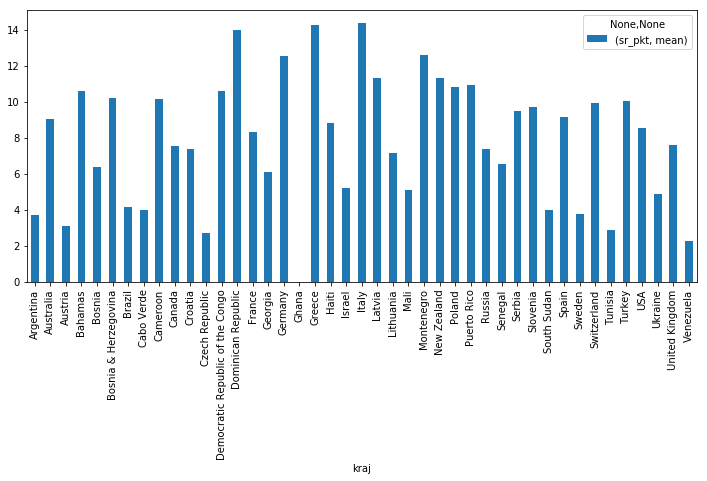

In [14]:
grupa.plot.bar(figsize=(12,5))

   ### Użyjmy również funkcji agregującej do sprawdzenia, która drużyna miała największą średnią asyst:

In [65]:
team = NBA_16.groupby(['druzyna']).agg({'sr_as':['mean']})

### Poniżej widać, że to Golden State - drużyna, która wygrała sezon 16/17.

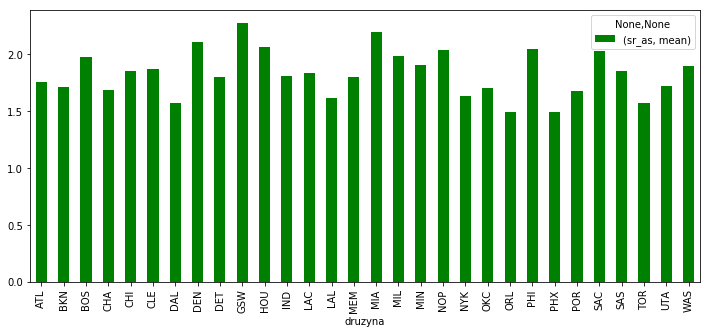

In [66]:
team.plot.bar(figsize=(12,5),color='green')

### Stwórzmy nowe dane ograniczone dla jednego kraju:

In [72]:
NBA_France=NBA_16[NBA_16['kraj']=='France'].sort_values(by='sr_pkt')   #Francja
NBA_France.tail()

,druzyna,wiek,wzrost,waga,kraj,rok_draftu,gry_sezon,sr_pkt,sr_zb,sr_as,sezon
zawodnik,,,,,,,,,,,
Timothe Luwawu-Cabarrot,PHI,22.0,198.12,92.98636,France,2016,69,6.4,2.2,1.1,2016-17
Tony Parker,SAS,35.0,187.96,83.91452,France,2001,63,10.1,1.8,4.5,2016-17
Rudy Gobert,UTA,25.0,215.90,111.13004,France,2013,81,14.0,12.8,1.2,2016-17
Nicolas Batum,CHA,28.0,203.20,90.71840,France,2008,77,15.1,6.2,5.9,2016-17
Evan Fournier,ORL,24.0,200.66,92.98636,France,2012,68,17.2,3.1,3.0,2016-17


### Ciekawym zagadnieniem może być zależność między wagą, a liczbą punktów. Poniżej pokażemy jak to wygląda dla np. Francji: 

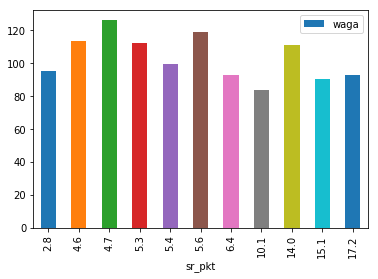

In [67]:
NBA_France.sort_values(by='sr_pkt')
NBA_France.plot.bar(y='waga',x='sr_pkt') # najprostszy wykres średniej punktow w zależności od wagi we Francji

### Możemy wyliczyć współczynnik kierunkowy (x) oraz wyraz wolny (Intercept) dla funkcji liniowej.

In [68]:
x, y = [],[]
x=NBA_16['waga']
y=NBA_16['wzrost']
    
dane_test = pd.DataFrame(data = [x,y])
dane_test.head()

dane_test_ = dane_test.T
dane_test_.columns=["x","y"] 
dane_test_.head()


mod = smf.ols(formula='y ~ x', data=dane_test_)

res = mod.fit()

a = res.params['x'] # współczynnik kierunkowy
b = res.params['Intercept'] # wyraz wolny
print(res.params)


Intercept    138.286949
x              0.627209
dtype: float64


### Możemy zrobić regresję liniową dla wzrostu i wagi:

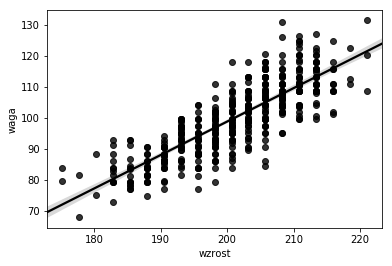

In [69]:
sns.regplot(x=NBA_16['wzrost'], y=NBA_16['waga'], fit_reg=True,color='black')
plt.xlabel('wzrost')
plt.ylabel('waga')
plt.show()

### Postanowiliśmy porównać czynniki (średnią punktów, wiek oraz wzrost) w stostunku do ilości gier (max 82):

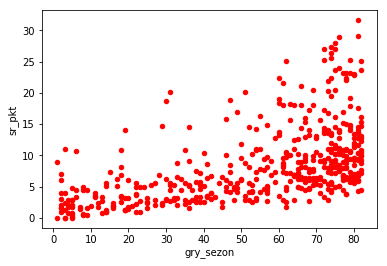

In [70]:
NBA_16.plot(kind='scatter',x='gry_sezon',y='sr_pkt',color='red',)
plt.show()

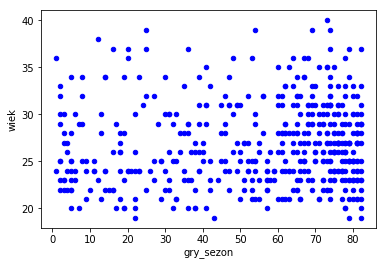

In [36]:
NBA_16.plot(kind='scatter',x='gry_sezon',y='wiek',color='blue',)
plt.show()

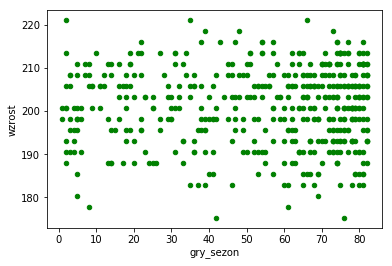

In [34]:
NBA_16.plot(kind='scatter',x='gry_sezon',y='wzrost',color='green')
plt.show()

### Jak widać na powyższych wykresach, najbardziej determinującym czynnikiem okazała się średnia punktów.

### Sprawdźmy jeszcze która drużyna biorac pod uwagę tylko francuskich zawodników wygrywa w średniej punktów:

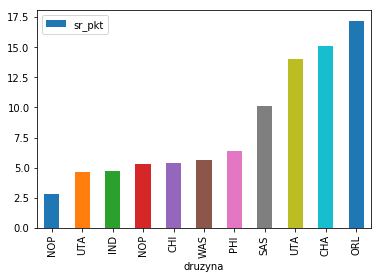

In [62]:
NBA_France.plot(kind='bar', x='druzyna',y='sr_pkt')
plt.show()

### Jest to Orlando Magic. 